# **Lecture 02 - ODEs**: Supplementary Interactive Material

--------------------------------------------------------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

**The Initial Value Problem**

Consider a model of Logistic Growth, or growth in a system with some limited carrying capacity..

The simplest model is:

$$ \dot{y}(t) = \gamma y(t) \left(1-\frac{y(t)}{\mathcal{K}} \right), \qquad y(0) = y_0 $$

*Where:*
1) $\gamma$ is the growth rate
2) $\mathcal{K}$ is the carrying Capacity
3) $y_0$ is the initial population

The ODE alone provides us the tools necessary to approximate a solution for some initial condition, given it prescribes an instananeous slope provided we have some data point $y(t)$ to begin with. 

Consider what would happen if we just used, say Eulers's Forward method, to walk along what we think to be the trajectory of the function y(t):

*Recall Forward Euler Method*

$$f(x_{n+1}) \approx f(x_n) + f'(x_n)\cdot h$$

Where $h$ is the spacing between $x_{n+1}$ and $x_n$

**What if we apply this to our model of population Growth?**

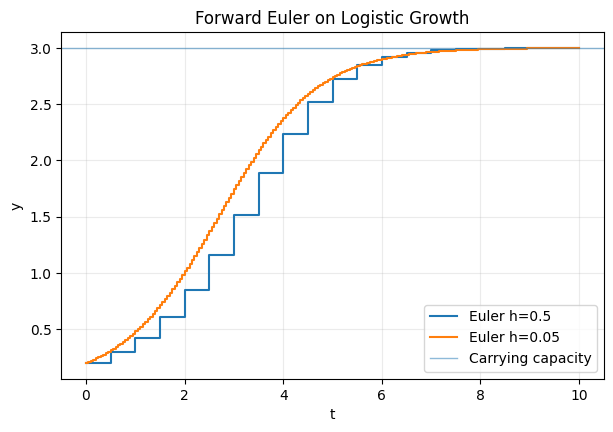

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic IVP: y' = r y (1 - y/K),  y(0) = y0
r, K = 1.0, 3.0
y0   = 0.2
t0, T = 0.0, 10.0   # <-- renamed final time to T

def f(t, y, r=r, K=K):
    return r * y * (1 - y / K)

def euler(f, t0, T, y0, h):
    N = int(np.ceil((T - t0) / h))
    t = t0 + np.arange(N+1) * h
    y = np.empty(N+1, dtype=float)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + h * f(t[n], y[n])
    return t, y

# Two step sizes to compare
h1 = 0.5
h2 = 0.05

t1, y1 = euler(f, t0, T, y0, h1)
t2, y2 = euler(f, t0, T, y0, h2)

plt.figure(figsize=(7,4.5))
plt.step(t1, y1, where="post", label=f"Euler h={h1}")
plt.step(t2, y2, where="post", label=f"Euler h={h2}")
plt.axhline(K, lw=1, alpha=0.5, label="Carrying capacity")
plt.xlabel("t"); plt.ylabel("y")
plt.title("Forward Euler on Logistic Growth")
plt.legend(); plt.grid(True, alpha=0.25)
plt.show()


**Where Euler Breaks Down**

Forward Euler is the simplest time-stepping method one can employ, but while it is
sufficient for some problems, it can become inaccurate or unstable for some systems.In Euler’s method, the slope is always taken at the beginning of the interval, which may not represent the true behavior of the solution over the entire step.

A natural refinement is to improve the slope estimate by also considering the midpoint
of the interval. This leads to the *second-order Runge--Kutta method (RK2)*:

$$
\begin{aligned}
k_1 &= f(t_n, y_n), \\
k_2 &= f\!\left(t_n + \tfrac{h}{2},\, y_n + \tfrac{h}{2} k_1 \right), \\
y_{n+1} &= y_n + h\,k_2
\end{aligned}
$$


Here $k_1$ is the slope at the beginning of the step, and $k_2$ is the slope at the midpoint.
By using $k_2$ to advance the solution, we obtain a method that is still explicit and easy to
implement, but with second-order accuracy. This means the global error decreases like
$\mathcal{O}(h^2)$, compared to Euler’s $\mathcal{O}(h)$.


### The Pendulum ODE

We are solving the damped pendulum equation:

$$
\begin{aligned}
\dot{\theta} &= \omega, \\
\dot{\omega} &= -\tfrac{g}{L}\,\sin(\theta) - \gamma \cdot \omega,
\end{aligned}
$$

with parameters:
- $L = 1.0 \ \text{m}$ (pendulum length)  
- $g = 9.81 \ \text{m/s}^2$ (gravity)  
- $\gamma$ (damping) $= 0.15$ (friction coefficient)  
- initial angle $\theta_0 = \pi/3$ rad (60°)  
- initial angular velocity $\omega_0 = 0$ rad/s  

We now compare the **Euler** and **RK2** time-stepping methods for this system.


In [43]:
# Pendulum parameters
L = 1.0      # length (m)
g = 9.81     # gravity (m/s^2)
damping = 0.15
theta0 = np.pi/3   # initial angle (rad)
omega0 = 0.0       # initial angular velocity (rad/s)

# ODE system for pendulum
def pendulum_ode(state, t):
    theta, omega = state
    theta_dot = omega
    omega_dot = -(g/L)*np.sin(theta) - damping*omega
    return np.array([theta_dot, omega_dot])

# Integrators
def euler_step(f, state, t, dt):
    return state + dt * f(state, t)

def rk2_step(f, state, t, dt):
    k1 = f(state, t)
    k2 = f(state + 0.5*dt*k1, t + 0.5*dt)
    return state + dt * k2

# Time discretization
dt = 0.08
t_max = 10.0
t = np.arange(0, t_max, dt)
n_steps = len(t)

# Arrays for storing solutions
theta_euler = np.zeros(n_steps)
theta_rk2   = np.zeros(n_steps)

# Initial states
state_euler = np.array([theta0, omega0])
state_rk2   = np.array([theta0, omega0])
theta_euler[0], _ = state_euler
theta_rk2[0], _   = state_rk2

# Integrate
for i in range(1, n_steps):
    state_euler = euler_step(pendulum_ode, state_euler, t[i-1], dt)
    state_rk2   = rk2_step(pendulum_ode, state_rk2, t[i-1], dt)
    theta_euler[i] = state_euler[0]
    theta_rk2[i]   = state_rk2[0]

# Animation 2: Angle vs Time
fig2, ax2 = plt.subplots(figsize=(12, 6))

euler_angle_line, = ax2.plot([], [], 'r-', linewidth=2, label='Euler')
rk2_angle_line,   = ax2.plot([], [], 'b--', linewidth=2, label='RK2')
point_euler,      = ax2.plot([], [], 'ro', markersize=8)
point_rk2,        = ax2.plot([], [], 'bo', markersize=8)

ax2.set_xlim(0, t_max)
ax2.set_ylim(-2*theta0, 2*theta0)
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Angle θ (rad)")
ax2.set_title("Angle vs Time Animation: Euler vs RK2")
ax2.grid(True, alpha=0.3)
ax2.legend()

def update_sinusoid(frame):
    euler_angle_line.set_data(t[:frame], theta_euler[:frame])
    rk2_angle_line.set_data(t[:frame], theta_rk2[:frame])
    if frame > 0:
        point_euler.set_data([t[frame-1]], [theta_euler[frame-1]])
        point_rk2.set_data([t[frame-1]], [theta_rk2[frame-1]])
    return euler_angle_line, rk2_angle_line, point_euler, point_rk2

ani2 = FuncAnimation(fig2, update_sinusoid, frames=range(0, n_steps, 5),
                     interval=50, blit=True, repeat=True)

plt.close(fig2)  # prevent duplicate static plot

# Show in Jupyter
HTML(ani2.to_jshtml())
